### ***Installing Necessary libraries***

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
from datetime import datetime
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

### ***Reshaping the training dataset in the required format that can be used by LSTM architecture for training***

In [ ]:
# Sample a sliding window for each data point i.e. sample the data
def create_train_data(df_train, n_steps):
  X, Y = list(), list()
  for i in range(len(df_train)):
    sam = i + n_steps
    if sam > len(df_train)-1:
        break
    x, y = df_train.iloc[i:sam], df_train.iloc[sam]
    X.append(x)

    Y.append(y)
  X = np.array(X)
  Y = np.array(Y)
  print(X.shape)
  print(Y.shape)
  # Get the correct shape for the data
  X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
  Y = np.reshape(Y, (Y.shape[0], 1, Y.shape[1]))
  return X, Y

In [ ]:
# Sample a sliding window for each data point i.e. sample the data
def create_train_data(df_train, n_steps):
  X, Y = list(), list()
  for i in range(len(df_train)):
    sam = i + n_steps
    if sam > len(df_train)-1:
        break
    x, y = df_train.iloc[i:sam], df_train.iloc[sam]
    X.append(x)

    Y.append(y)
  X = np.array(X)
  Y = np.array(Y)
  X = np.expand_dims(X,axis=2)
  Y = np.expand_dims(Y,axis=1)
  print(X.shape)
  print(Y.shape)
  # Get the correct shape for the data
  X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
  Y = np.reshape(Y, (Y.shape[0], 1, Y.shape[1]))
  return X, Y

### ***Reshaping the Validation dataset in the required format that can be used by LSTM architecture for prediction***

In [ ]:
# Sample a sliding window for each data point i.e. sample the data
def create_test_data(df_train, df_test, n_steps):
  X, Y = list(), list()
  for i in range(len(df_test)):
    # if current step in the new df is smaller than the step size, we need old data
    if(i < n_steps):
      # How many old values do we need
      number_old = n_steps - i
      x = df_train.iloc[len(df_train)-number_old:len(df_train)]
      # append the new values
      x = x.append(df_test.iloc[0:i])
      y = df_test.iloc[i]
    else:
      x, y = df_test.iloc[i-n_steps:i], df_test.iloc[i]
    X.append(x)

    Y.append(y)
  X = np.array(X)
  Y = np.array(Y)
  # Get the correct shape for the data
  X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
  Y = np.reshape(Y, (Y.shape[0], 1, Y.shape[1]))
  return X, Y

In [ ]:
# Sample a sliding window for each data point i.e. sample the data
def create_test_data(df_train, df_test, n_steps):
  X, Y = list(), list()
  for i in range(len(df_test)):
    # if current step in the new df is smaller than the step size, we need old data
    if(i < n_steps):
      # How many old values do we need
      number_old = n_steps - i
      x = df_train.iloc[len(df_train)-number_old:len(df_train)]
      # append the new values
      x = x.append(df_test.iloc[0:i])
      y = df_test.iloc[i]
    else:
      x, y = df_test.iloc[i-n_steps:i], df_test.iloc[i]
    X.append(x)

    Y.append(y)

  X = np.expand_dims(X,axis=2)
  Y = np.expand_dims(Y,axis=1)
  print(X.shape)
  print(Y.shape)
  X = np.array(X)
  Y = np.array(Y)
  # Get the correct shape for the data
  X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
  Y = np.reshape(Y, (Y.shape[0], 1, Y.shape[1]))
  return X, Y

### ***Applying MinMax Normalization to the training dataset to transform dataset value between the range of 0 and 1***

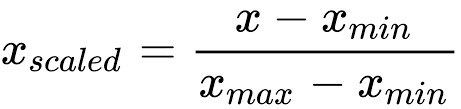

In [ ]:
def scale_data_train(df_train):
    sc = MinMaxScaler()
    df_train["cpu"] = sc.fit_transform(df_train["cpu"].values.reshape(-1, 1))
    return sc, df_train

In [ ]:
def scale_data_train(df_train):
    sc = MinMaxScaler()
    df_train["data__result__values__002"] = sc.fit_transform(df_train["data__result__values__002"].values.reshape(-1, 1))
    return sc, df_train

### ***Applying MinMax Normalization to the Validation dataset to transform dataset value between the range of 0 and 1***

In [ ]:
def scale_data_test(df_test, sc):
    df_test["cpu"] = sc.transform(df_test["cpu"].values.reshape(-1, 1))
    return df_test

***Defining function to perform all the above function i.e loading dataset, performing normalization and transforming data into the required format for LSTM Structure***

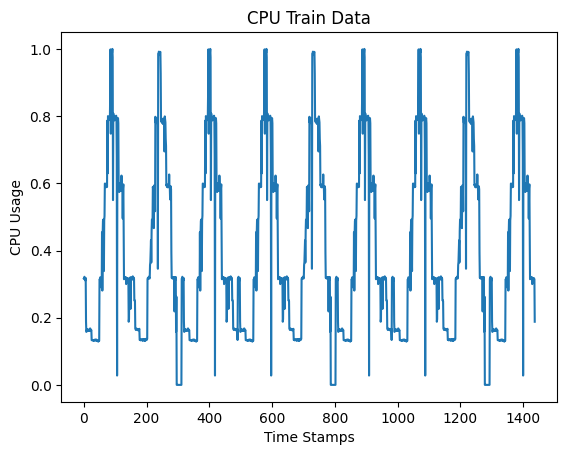

In [ ]:
df_train = pd.read_csv(r"data.csv")


df_train = df_train.set_index("datetime")
df_train = df_train.sort_index()

#----------------------------------------- Normalization -----------------------------------------
scaler, df_train = scale_data_train(df_train)


plt.plot(np.array(df_train))

plt.title("CPU Train Data")
plt.xlabel("Time Stamps")
plt.ylabel("CPU Usage")
plt.show()

In [ ]:
def get_data(window_size):
    # full_df = pd.read_csv(r"C:\Users\simon\Nextcloud\programmingProjects\freelancer\projects\2022-09-01_NeuralNetwork_cpu_utilization\data\data_2\archive\cpu-full-a.csv")
    # Load the data
    #df_train = pd.read_csv(r"cpu-train-a.csv")
    #df_test = pd.read_csv(r"cpu-test-a.csv")

    df_train = pd.read_csv(r"data.csv")
    df_test = pd.read_csv(r"data-test.csv")

    # Make datetime to index
    df_train = df_train.set_index("datetime")
    df_train = df_train.sort_index()

    df_test = df_test.set_index("datetime")
    df_test = df_test.sort_index()

    #----------------------------------------- Normalization -----------------------------------------
    scaler, df_train = scale_data_train(df_train)

    df_test = scale_data_test(df_test, scaler)

    plt.plot(np.array(df_test))

    plt.title("CPU Test Data")
    plt.xlabel("Time Stamps")
    plt.ylabel("CPU Usage")
    plt.show()
    print(df_train.shape)
    # Create datasets
    x_train, y_train = create_train_data(df_train, window_size)

    x_test, y_test = create_test_data(df_train, df_test, window_size)

    return scaler, x_train, y_train, x_test, y_test

In [ ]:
df_train = pd.read_csv(r"alex-50hours.csv")

print(df_train["data__result__values__002"].iloc[0:79])

0     0.004418
1     0.004403
2     0.004412
3     0.004482
4     0.004408
        ...   
74    0.008219
75    0.008169
76    0.010890
77    0.008724
78    0.011074
Name: data__result__values__002, Length: 79, dtype: float64


In [ ]:
import locale

In [ ]:
!sudo dpkg-reconfigure locales

In [ ]:
import os

# Install de_DE
!/usr/share/locales/install-language-pack de_DE
!dpkg-reconfigure locales

# Restart Python process to pick up the new locales
os.kill(os.getpid(), 9)

Generating locales (this might take a while)...
  de_DE.ISO-8859-1... done
Generation complete.
dpkg-trigger: error: must be called from a maintainer script (or with a --by-package option)

Type dpkg-trigger --help for help about this utility.
Generating locales (this might take a while)...
  de_DE.ISO-8859-1... done
  en_US.UTF-8... done
Generation complete.


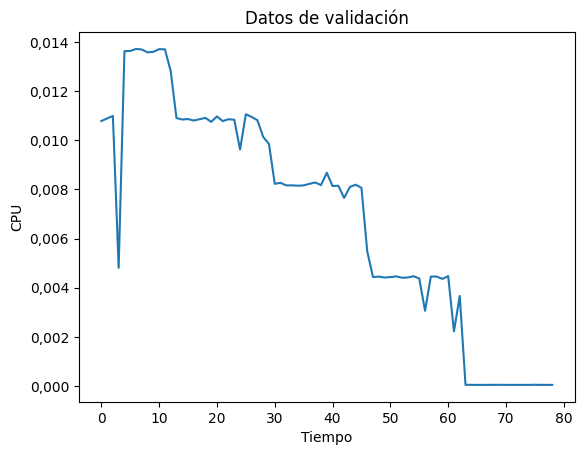

In [ ]:
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")
plt.rcdefaults()
# Tell matplotlib to use the locale we set above
plt.rcParams['axes.formatter.use_locale'] = True


plt.plot(np.array(df_train["data__result__values__002"].iloc[234:]))
plt.title('Datos de validación')
plt.ylabel('CPU')
plt.xlabel('Tiempo')
#plt.legend(['valores de CPU'], loc='upper left')
plt.show()

In [ ]:
def get_data(window_size):


    df_train = pd.read_csv(r"alex-50hours.csv")


    #----------------------------------------- Normalization -----------------------------------------
    scaler, df_train = scale_data_train(df_train)

    print(df_train.shape)
    # Create datasets

    print(df_train["data__result__values__002"].shape)
    x_train, y_train = create_train_data(df_train["data__result__values__002"], window_size)

    x_test, y_test = create_test_data(df_train["data__result__values__002"].iloc[:234], df_train["data__result__values__002"].iloc[234:], window_size)

    return scaler, x_train, y_train, x_test, y_test

### ***Defining the function of drop out to use in LSTM Architecture***

***Dropouts is a Regularization technique where Randomly selected neurons are ignored during training to prevent the architecture/Model from getting overfitted.***

In [ ]:
from keras.layers import Lambda
#from keras.layers.core import Lambda
from keras import backend as K

def PermaDropout(rate):
    return Lambda(lambda x: K.dropout(x, level=rate))

***Defining the function to create the structure of the proposed LSTM Architecture and using training dataset to train on 300 epochs.***

In [ ]:
def create_model(x_train, y_train, window_size):
    # # Make tensors because of custom loss function
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(1, window_size), return_sequences=True))
    model.add(PermaDropout(0.2))
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dense(1))
    #opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.05, beta_2=0.1999)
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.05, beta_2=0.8999)
    model.compile(optimizer=opt, loss='mse')
    history = model.fit(x_train, y_train, epochs=300, batch_size=200, validation_split=0.1,verbose=0)
    """plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')"""

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Pérdida de modelo')
    plt.ylabel('Pérdida')
    plt.xlabel('Épocas')
    plt.legend(['Pérdida del dataset de entrenamiento', 'Pérdida del intervalo de validación'], loc='upper left')
    plt.show()
    #print(model.summary())
    return model

In [ ]:
def create_model(x_train, y_train, window_size):
    # # Make tensors because of custom loss function
    model = Sequential()
    model.add(LSTM(32, activation='relu', input_shape=(1, window_size), return_sequences=True))
    model.add(PermaDropout(0.2))
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dense(1))
    #opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.05, beta_2=0.1999)
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='mse')
    history = model.fit(x_train, y_train, epochs=50, batch_size=50, validation_split=0.1,verbose=0)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    """plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')"""

    plt.title('Pérdida de modelo')
    plt.ylabel('Pérdida')
    plt.xlabel('Épocas')
    plt.legend(['Pérdida del dataset de entrenamiento', 'Pérdida del intervalo de validación'], loc='upper left')

    plt.show()
    #print(model.summary())
    return model

***Function to get predictions of certain value on different iterations***

In [ ]:
def predict_confidence(model, value, iterations):
    # Predict confidence and value
    predictions = []
    for i in range(iterations):
        predictions.append(model.predict(value))


In [ ]:
def plot_differences(predicted, orig):
    x = [i for i in range(len(predicted))]
    plt.plot(x, predicted)
    plt.plot(x, orig)
    plt.legend(['predicted', 'Orignal'], loc='upper left')
    plt.show()

In [ ]:
def plot_differences(predicted, orig):
    x = [i for i in range(len(predicted))]
    plt.plot(x, predicted)
    plt.plot(x, orig)
    plt.title('Datos de validación')
    #plt.title('datos de entrenamiento')
    plt.ylabel('CPU values')
    plt.xlabel('número de valor')
    plt.legend(['valores predichos', 'salidas originales'], loc='upper left')
    plt.show()

### ***Defining the interval sequence size of 150 and starting training process.***

(313, 4)
(313,)
(163, 150, 1)
(163, 1)
(79, 150, 1)
(79, 1)


<ipython-input-6-695a9f99e82d>:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df_test.iloc[0:i])


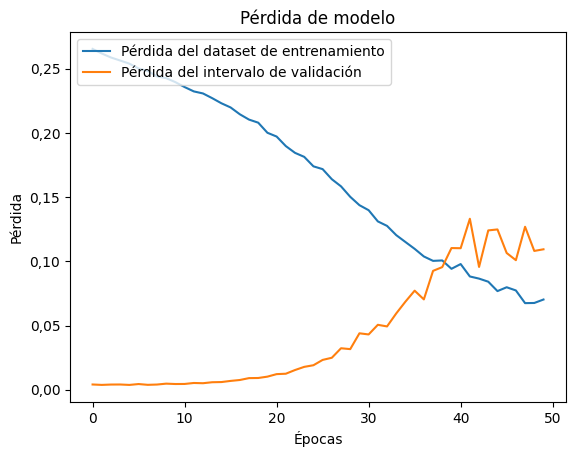

6/6 [==============================] - 0s 3ms/step


In [ ]:
# Parameters:
window_size = 150
#window_size = 10


scaler, x_train, y_train, x_test, y_test = get_data(window_size)
#scaler, x_train, y_train = get_data(window_size)

y_train = y_train[:,0,0]
y_test = y_test[:,0,0]

model = create_model(x_train, y_train, window_size)

train_predict = model.predict(x_train)


In [ ]:
train_predict = model.predict(x_train)

6/6 [==============================] - 0s 3ms/step


In [ ]:
print(x_test.shape)
print(x_test[0,0,:])

***Transforming the normalized values of predictions and labels back to the original range and plotting difference***

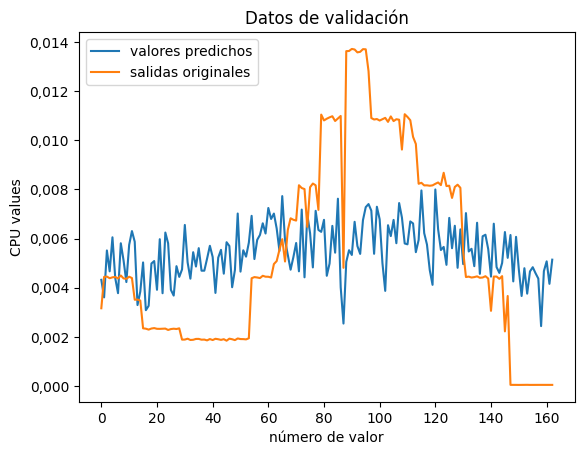

In [ ]:
rescaled_predicted = scaler.inverse_transform(train_predict.reshape(-1, 1))
rescaled_y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
plot_differences(rescaled_predicted, rescaled_y_train)

***Calculating Naive forecast of training dataset by using labels(y_train). Subtracting next value from previous and calculating the difference(loss).***

***Then Calculating Mean square error for both naive forecast values and the predictions generated from LSTM architecture and plotting them using matplot.***

train mean_squared_error model
1.267992762077678e-05
train mean_squared_error naive forecast
1.1996511259780194e-06


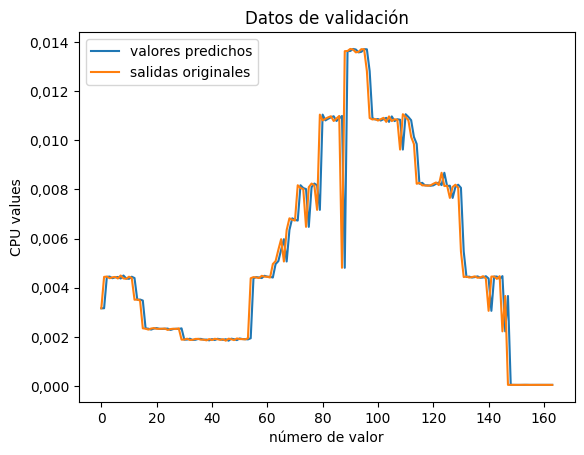

In [ ]:
from sklearn.metrics import mean_squared_error

# calcular el mean_squared_error de la prediccion
mse = mean_squared_error(rescaled_y_train, rescaled_predicted)

print('train mean_squared_error model')
print(mse)

# calcular el mean_squared_error de la prediccion naive forecast

pred_naive = np.insert(rescaled_y_train, 0, rescaled_y_train[0])
y_train_naive = np.insert(rescaled_y_train, rescaled_y_train.size, rescaled_y_train[rescaled_y_train.size-1])

mse = mean_squared_error(y_train_naive, pred_naive)

print('train mean_squared_error naive forecast')
print(mse)

plot_differences(pred_naive, y_train_naive.reshape(-1, 1))

***Calculating RMSE value for training dataset***

In [ ]:
print(rescaled_y_train.shape)
print()
print(rescaled_predicted.shape)

# calculating RMSE

MSE = np.square(np.subtract(rescaled_y_train,rescaled_predicted)).mean()

rsme = math.sqrt(MSE)

print()

print()

print("RMSE value = ",rsme)


(163, 1)

(163, 1)


RMSE value =  0.0018867207331925357


### ***Now Evaluating the performance of proposed LSTM Architecture on validation/testing dataset***

***Method 1***

these are all new 456 predictions values only 150 from x_test (validation set). Remaining are generated from first 150 values and predictions generated are used to generate further new predictions.

[0.75414306, 0.7357569, 0.81458116, 0.7462271, 0.82018, 0.85416347, 0.9569127, 0.7306304, 0.7417837, 0.97584546, 0.84951633, 0.834824, 0.85223126, 0.8984083, 0.8680518, 0.8998033, 0.7972246, 0.7918909, 0.78858775, 0.7030191, 0.6416473, 0.68639994, 0.73243403, 0.6925237, 0.7183905, 0.6979916, 0.7568192, 0.68713653, 0.68666923, 0.6604912, 0.6555045, 0.62915903, 0.6476071, 0.6425431, 0.5607464, 0.59940237, 0.56938696, 0.54537463, 0.55242896, 0.5501438, 0.5116809, 0.4895733, 0.5297793, 0.5001258, 0.43871576, 0.4279385, 0.4615847, 0.3827216, 0.3788789, 0.38434744, 0.37502515, 0.34610105, 0.28353497, 0.29378957, 0.33619973, 0.2655529, 0.28707156, 0.2880388, 0.30513754, 0.31214124, 0.2495028, 0.27465165, 0.25617492, 0.33082357, 0.22032245, 0.23887631, 0.28972414, 0.3171785, 0.26523086, 0.28431678, 0.31941137, 0.25009695, 0.28356975, 0.32408372, 0.31127697, 0.2911519, 0.23293205, 0.29590267, 0.28667787]
[[0.0104416 ]
 [0.01018809]
 [0.01127491]
 [0.01033245]
 [0.0113521 ]
 [0.01182066]
 [0.013

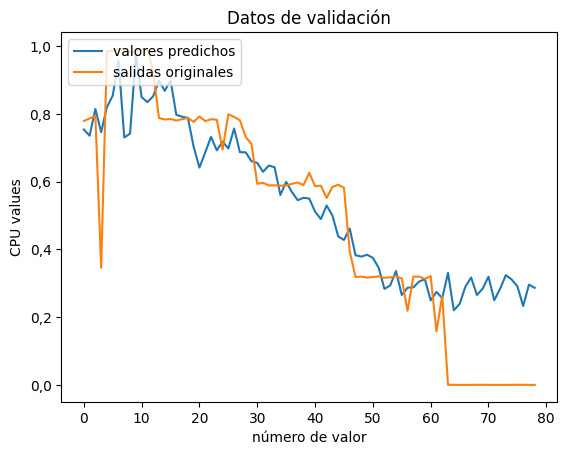

In [ ]:
# create test predictions
start_window = x_test.tolist()
start_window = start_window[0][0]
predictions = []

for i in range(len(y_test)):
    new_val = model.predict([[start_window]], verbose=0)
    predictions.append(new_val[0][0])

    # plt.plot(start_window, label='Real data')
    # plt.plot(len(start_window), new_val[0][0], "bx", markersize=10, label='Predicted data', color='red')
    # plt.show()

    start_window.append(float(new_val[0][0]))
    start_window = start_window[1:]

print(predictions)
print(scaler.inverse_transform(np.array(predictions).reshape(-1,1)))

plot_differences(predictions, y_test.reshape(-1, 1))

***Calculating Mean Square Error of predictions generated on validation/testing dataset and plotting using Matplot***

mean_squared_error model
0.02452707822981182
mean_squared_error naive forecast
0.010527875204420901


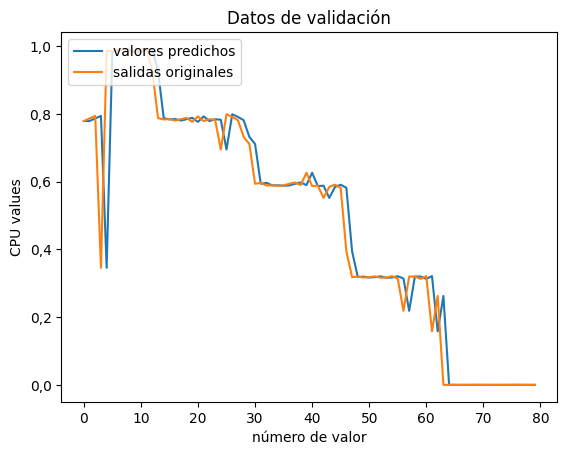

In [ ]:
from sklearn.metrics import mean_squared_error

# calcular el mean_squared_error de la prediccion
rescaled_y_test = y_test.reshape(-1, 1)
mse = mean_squared_error(rescaled_y_test, predictions)

print('mean_squared_error model')
print(mse)

# calcular el mean_squared_error de la prediccion naive forecast

pred_naive_test = np.insert(rescaled_y_test, 0, rescaled_y_test[0])
y_test_naive = np.insert(rescaled_y_test, rescaled_y_test.size, rescaled_y_test[rescaled_y_test.size-1])

mse = mean_squared_error(y_test_naive, pred_naive_test)

print('mean_squared_error naive forecast')
print(mse)

plot_differences(pred_naive_test, y_test_naive.reshape(-1, 1))

***Method 2*** (Simple method)

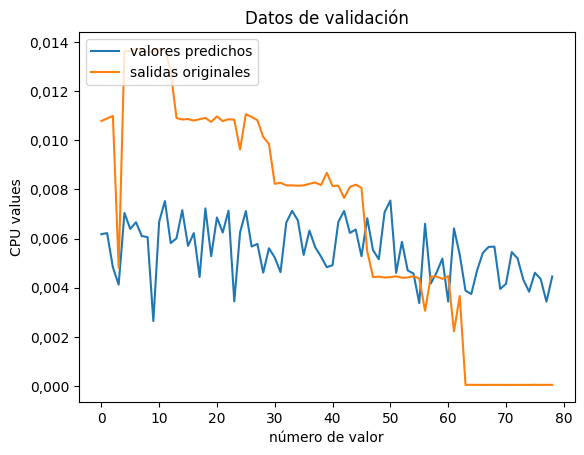

In [ ]:

predictions = model.predict(x_test, verbose=0)

#transforming the normalized (0,1) range prediction values to the orignal range
rescaled_predictions = scaler.inverse_transform(predictions.reshape(-1,1))
rescaled_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plot_differences(rescaled_predictions.reshape(-1, 1), rescaled_y_test.reshape(-1, 1))

mean_squared_error model
1.887000839657693e-05
mean_squared_error naive forecast
2.00139376492051e-06


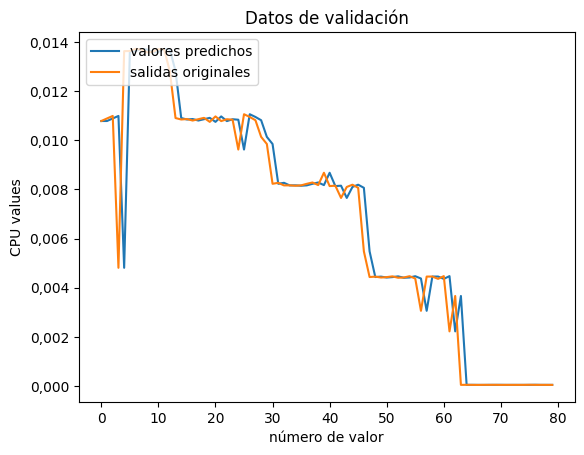

In [ ]:
from sklearn.metrics import mean_squared_error


#rescaled_y_test = y_test.reshape(-1, 1)
rescaled_y_test = rescaled_y_test.reshape(-1, 1)
#mse = mean_squared_error(rescaled_y_test, predictions.reshape(-1, 1))
mse = mean_squared_error(rescaled_y_test.reshape(-1, 1), rescaled_predictions.reshape(-1, 1))

print('mean_squared_error model')
print(mse)

# calcular el mean_squared_error de la prediccion naive forecast

pred_naive_test = np.insert(rescaled_y_test, 0, rescaled_y_test[0])
y_test_naive = np.insert(rescaled_y_test, rescaled_y_test.size, rescaled_y_test[rescaled_y_test.size-1])

mse = mean_squared_error(y_test_naive, pred_naive_test)

print('mean_squared_error naive forecast')
print(mse)

plot_differences(pred_naive_test, y_test_naive.reshape(-1, 1))

***Calculating RMSE value for validation dataset***

In [ ]:
print(rescaled_y_test.shape)
print()
print(np.array(rescaled_predictions).reshape(-1, 1).shape)

# calculating RMSE

MSE = np.square(np.subtract(rescaled_y_test,rescaled_predictions.reshape(-1, 1))).mean()

rsme = math.sqrt(MSE)

print()

print()

print("RMSE value = ",rsme)


(79, 1)

(79, 1)


RMSE value =  0.0019800698317580805


### ***------------------------------------------***

# ***Will complete mean confidence interval tomorrow***

In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.85):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
start_window = x_test.tolist()
start_window = start_window[0][0]
predictions = []
for i in range(20):
    predictions.append(model.predict([[x_test.tolist()[42][0]]], verbose = 0)[0][0])

pred_mean, upper_conf, lower_conf = mean_confidence_interval(predictions, confidence=0.95)
print(pred_mean)
print(upper_conf)
print(lower_conf)
#print(start_window)
print(x_test.tolist()[42][0])
print(predictions)

print(model.predict([[x_test.tolist()[42][0]]], verbose = 0)[0][0])

0.18826781
0.17819337782690722
0.19834224643876355
0.010074434305928165
[0.2525252525252526, 0.23737373737373746, 0.2272727272727274, 0.2575757575757577, 0.23737373737373746, 0.21212121212121215, 0.19191919191919193, 0.17676767676767685, 0.15656565656565663, 0.14141414141414144, 0.1363636363636364, 0.1363636363636364, 0.19191919191919193, 0.15656565656565663, 0.14141414141414144, 0.1868686868686869, 0.15151515151515155, 0.12121212121212133, 0.10606060606060613, 0.09090909090909094, 0.08080808080808083, 0.06565656565656569, 0.09090909090909094, 0.07070707070707072, 0.06060606060606061, 0.055555555555555636, 0.06060606060606061, 0.055555555555555636, 0.055555555555555636, 0.055555555555555636, 0.06060606060606061, 0.09090909090909094, 0.1010101010101011, 0.0757575757575758, 0.06565656565656569, 0.06565656565656569, 0.06565656565656569, 0.11111111111111122, 0.1010101010101011, 0.1010101010101011, 0.1010101010101011, 0.11111111111111122, 0.1262626262626263, 0.1363636363636364, 0.1515151515

In [ ]:
actual_outputs_mean = np.mean(x_test)  # X_bar

mean_difference = x_test - actual_outputs_mean   # X_i - X_bar

sum_of_square_difference = np.square(mean_difference).sum()

print(actual_outputs_mean)
print(mean_difference)
print(sum_of_square_difference)


In [ ]:
print(x_test)



---



### ***Prediction Interval*** (completed)

 Prediction intervals are used to provide a range where the forecast is likely to be with a specific degree of confidence. For example, if you made 100 forecasts with 95% confidence, you would have 95 out of 100 forecasts fall within the prediction interval. By using a prediction interval you can account for uncertainty in the forecast, and the random variation of the data.

### ***Method 1***

### ***90% prediction interval (alpha = 0.1)***

Works Good for Linear regression problems

Using the Below equation the 90% of the prediction interval will be calculated from prediction values of the custom LSTM model

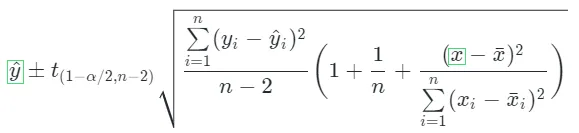

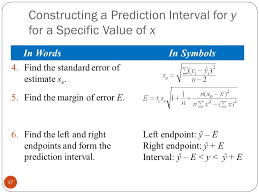

In [ ]:
def prediction_interval(input_samples,actual_outputs,predictions, alpha=0.1):

  n = len(predictions)

  actual_outputs_mean = np.mean(input_samples)  # X_bar

  mean_difference = input_samples - actual_outputs_mean   # X_i - X_bar

  sum_of_square_difference = np.square(mean_difference).sum() # SUM(X_i - X_bar)^2

  t_variable = scipy.stats.t.ppf((1 - alpha) / 2., df = n - 2)

  predictions_lower_limits = []

  predictions_upper_limits = []

  # Find predictions errors / standard Error of estimate
  standard_error = np.sqrt(np.square(actual_outputs - predictions).sum()/(n - 2))

  for i, value in enumerate(actual_outputs):

    margin_of_error = t_variable * standard_error *  np.sqrt(1 + (1/n) + (np.square(np.mean(input_samples[i]) - actual_outputs_mean)/sum_of_square_difference))

    # calculating lower prediction interval limit (left End Point)
    predictions_lower_limits.append(predictions[i] - margin_of_error)

    # calculating upper prediction interval limit (Right End Point)
    predictions_upper_limits.append(predictions[i] + margin_of_error)


    pass


  return predictions_lower_limits, predictions_upper_limits
  pass

In [ ]:
predictions_upper_limits, predictions_lower_limits = prediction_interval(input_samples = x_test,
                                                                         actual_outputs = y_test, predictions = predictions[:,0], alpha = 0.1)

In [ ]:
max_ranges = predictions_upper_limits
min_ranges = predictions_lower_limits

In [ ]:
dataFrame = pd.DataFrame(zip(predictions_lower_limits,predictions[:,0],predictions_upper_limits),
                         columns =['predictions_lower_limits', 'predictions', 'predictions_upper_limits'])

dataFrame = dataFrame.reset_index(drop=True)

In [ ]:
dataFrame

,predictions_lower_limits,predictions,predictions_upper_limits
0,0.693749,0.702621,0.711493
1,0.679526,0.688398,0.697270
2,0.748427,0.757299,0.766171
3,0.707906,0.716778,0.725650
4,0.708699,0.717571,0.726443
5,0.755532,0.764403,0.773275
6,0.732512,0.741384,0.750256
7,0.682845,0.691717,0.700589
8,0.664788,0.673660,0.682532
9,0.664469,0.673341,0.682213


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dataFrame, *['predictions_lower_limits'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dataFrame, *['predictions'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dataFrame, *['predictions_upper_limits'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dataFrame, *['predictions_lower_limits'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dataFrame, *['predictions'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dataFrame, *['predictions_upper_limits'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dataFrame, *[[['predictions_lower_limits', 'predictions'], ['predictions', 'predictions_upper_limits']]], **{})
chart

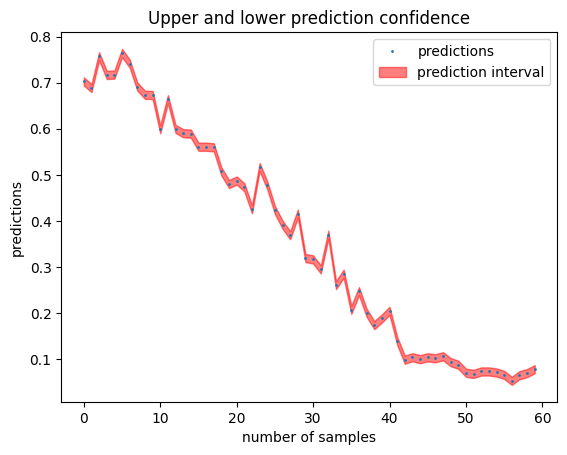

In [ ]:
numbers = range(len(predictions_lower_limits))

#plt.plot(numbers, min_ranges, 'y', label='min_ranges')

plt.plot(numbers, predictions[:,0], 'o', label='predictions', markersize=1)

#plt.scatter(numbers, predictions[:,0], label='predictions')

#plt.plot(numbers, max_ranges, 'b', label='max_ranges')

plt.fill_between(numbers, (min_ranges), (max_ranges), color='r', alpha=.5, label='prediction interval')
plt.title('Upper and lower prediction confidence')
plt.xlabel('number of samples')
plt.ylabel('predictions')
plt.legend()
plt.show()

### ***Method 2***

### ***95 % Prediction Interval***

***1.96 is used because the 95% confidence interval has only 2.5% on each side.***

In a normal distribution, 95% of data points fall within 1.96 standard deviations of the mean, so we multiply 1.96 by the RMSFE to get the prediction interval size.

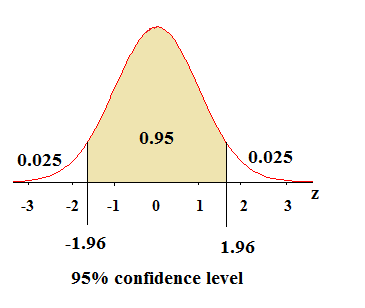

***2 Ways to calculate RMSE***

In [ ]:
predictions = rescaled_predictions.reshape(-1)
y_test  = rescaled_y_test.reshape(-1)
#rescaled_predictions = scaler.inverse_transform(predictions.reshape(-1,1))
#rescaled_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Method 1

sum_errs = np.sum((y_test.reshape(-1, 1) - predictions.reshape(-1, 1))**2)
RMSE = np.sqrt(1/(len(y_test.reshape(-1, 1).tolist())) * sum_errs)

print(RMSE)

print()

# Method 2

MSE = np.square(np.subtract(y_test.reshape(-1, 1),predictions.reshape(-1, 1))).mean()

RMSE = math.sqrt(MSE)

print(RMSE)

0.00434396229226002

0.00434396229226002


In [ ]:
def prediction_interval(actual_outputs,predictions):

  MSE = np.square(np.subtract(actual_outputs.reshape(-1, 1),predictions.reshape(-1, 1))).mean()

  RMSE = math.sqrt(MSE)

  interval_size = 1.96 * RMSE

  predictions_upper_limits = actual_outputs + interval_size
  predictions_lower_limits = actual_outputs - interval_size

  return predictions_upper_limits, predictions_lower_limits, RMSE
  pass

In [ ]:
predictions_upper_limits, predictions_lower_limits, RMSE = prediction_interval(actual_outputs = y_test ,predictions = predictions)

In [ ]:
"""dataFrame = pd.DataFrame(zip(predictions_lower_limits,predictions[:,0],predictions_upper_limits,y_test.reshape(-1)),
                         columns =['predictions_lower_limits', 'predictions', 'predictions_upper_limits','actual outputs'])

dataFrame = dataFrame.reset_index(drop=True)"""

In [ ]:
dataFrame = pd.DataFrame(zip(predictions_lower_limits,predictions,predictions_upper_limits,y_test),
                         columns =['predictions_lower_limits', 'predictions', 'predictions_upper_limits','actual outputs'])

dataFrame = dataFrame.reset_index(drop=True)

In [ ]:
dataFrame

,predictions_lower_limits,predictions,predictions_upper_limits,actual outputs
0,0.002272,0.006179,0.019300,0.010786
1,0.002376,0.006224,0.019404,0.010890
2,0.002478,0.004831,0.019506,0.010992
3,-0.003703,0.004127,0.013325,0.004811
4,0.005115,0.007041,0.022144,0.013630
...,...,...,...,...
74,-0.008469,0.003838,0.008560,0.000045
75,-0.008464,0.004610,0.008564,0.000050
76,-0.008469,0.004354,0.008560,0.000046
77,-0.008468,0.003434,0.008560,0.000046


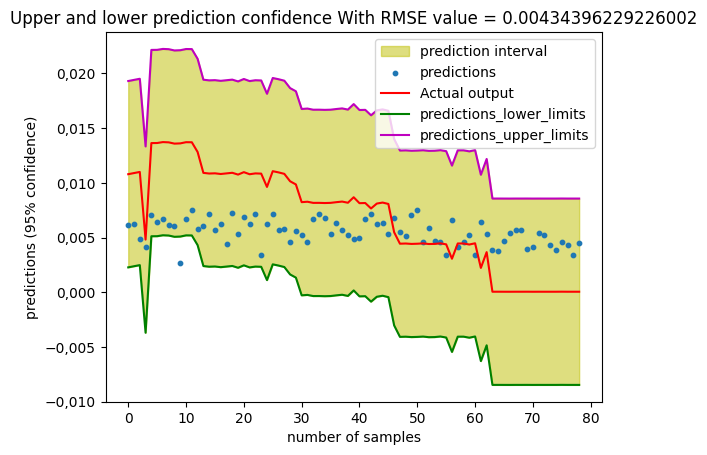

In [ ]:


numbers = range(len(predictions_lower_limits[0:150]))

#plt.plot(numbers, min_ranges, 'y', label='min_ranges')

#plt.plot(numbers, predictions[:,0], 'b', label='predictions')

plt.fill_between(numbers, (predictions_lower_limits[0:150]), (predictions_upper_limits[0:150]), color='y', alpha=.5, label='prediction interval')
#plt.scatter(numbers, predictions[0:150,0], label='predictions', s = 10)
plt.scatter(numbers, predictions[0:150], label='predictions', s = 10)

#plt.plot(numbers, max_ranges, 'b', label='max_ranges')

plt.plot(numbers, y_test[0:150], 'r', label='Actual output')

plt.plot(numbers, predictions_lower_limits[0:150], 'g', label='predictions_lower_limits')
plt.plot(numbers, predictions_upper_limits[0:150], 'm', label='predictions_upper_limits')


plt.title('Upper and lower prediction confidence With RMSE value = ' + str(RMSE))
plt.xlabel('number of samples')
plt.ylabel('predictions (95% confidence)')
plt.legend()
plt.show()

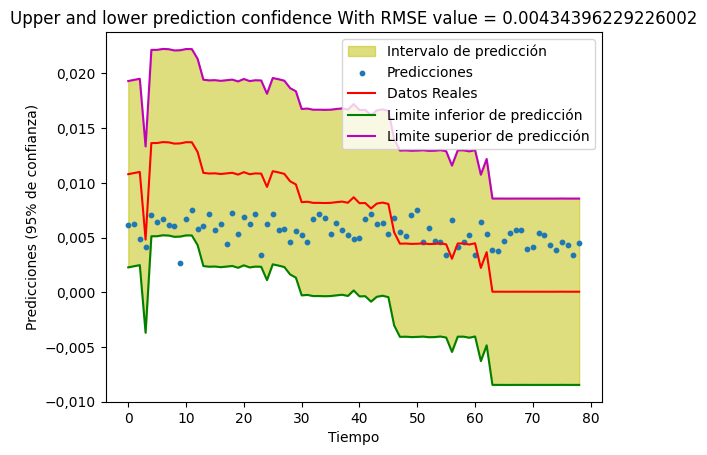

In [ ]:


numbers = range(len(predictions_lower_limits))

#plt.plot(numbers, min_ranges, 'y', label='min_ranges')

#plt.plot(numbers, predictions[:,0], 'b', label='predictions')

plt.fill_between(numbers, (predictions_lower_limits), (predictions_upper_limits), color='y', alpha=.5, label='Intervalo de predicción')
#plt.scatter(numbers, predictions[0:150,0], label='predictions', s = 10)

plt.scatter(numbers, predictions, label='Predicciones', s = 10)

#plt.plot(numbers, max_ranges, 'b', label='max_ranges')

plt.plot(numbers, y_test, 'r', label='Datos Reales')

plt.plot(numbers, predictions_lower_limits, 'g', label='Limite inferior de predicción')
plt.plot(numbers, predictions_upper_limits, 'm', label='Limite superior de predicción')


plt.title('Upper and lower prediction confidence With RMSE value = ' + str(RMSE))
plt.xlabel('Tiempo')
plt.ylabel('Predicciones (95% de confianza)')
plt.legend()
plt.show()



---



In [ ]:
def plot_series(series, y=None, y_pred=None, y_pred_std=None, x_label="$t$", y_label="$x$"):
  r, c = 3, 5
  fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, sharex=True, figsize=(20, 10))
  for row in range(r):
    for col in range(c):
        plt.sca(axes[row][col])
        ix = col + row*c
        plt.plot(series[ix,0, :], ".-")
        if y is not None:
            plt.plot(range(len(series[ix,0, :]), len(series[ix,0, :])+len(y[ix])), y[ix], "bx", markersize=10, color="red")
        # if y_pred is not None:
        #     plt.plot(range(len(series[ix,0, :]), len(series[ix,0, :])+len(y_pred[ix])), y_pred[ix], "ro")
        # if y_pred_std is not None:
        #     plt.plot(range(len(series[ix,0, :]), len(series[ix,0, :])+len(y_pred[ix])), y_pred[ix] + y_pred_std[ix])
        #     plt.plot(range(len(series[ix,0, :]), len(series[ix,0, :])+len(y_pred[ix])), y_pred[ix] - y_pred_std[ix])
        # plt.grid(True)
        # plt.hlines(0, 0, 100, linewidth=1)
        # plt.axis([0, len(series[ix,0, :])+len(y[ix]), -1, 1])
        # if x_label and row == r - 1:
        #   plt.xlabel(x_label, fontsize=16)
        # if y_label and col == 0:
        #   plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.show()

<ipython-input-106-3e2bf93887c2>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(len(series[ix,0, :]), len(series[ix,0, :])+len(y[ix])), y[ix], "bx", markersize=10, color="red")


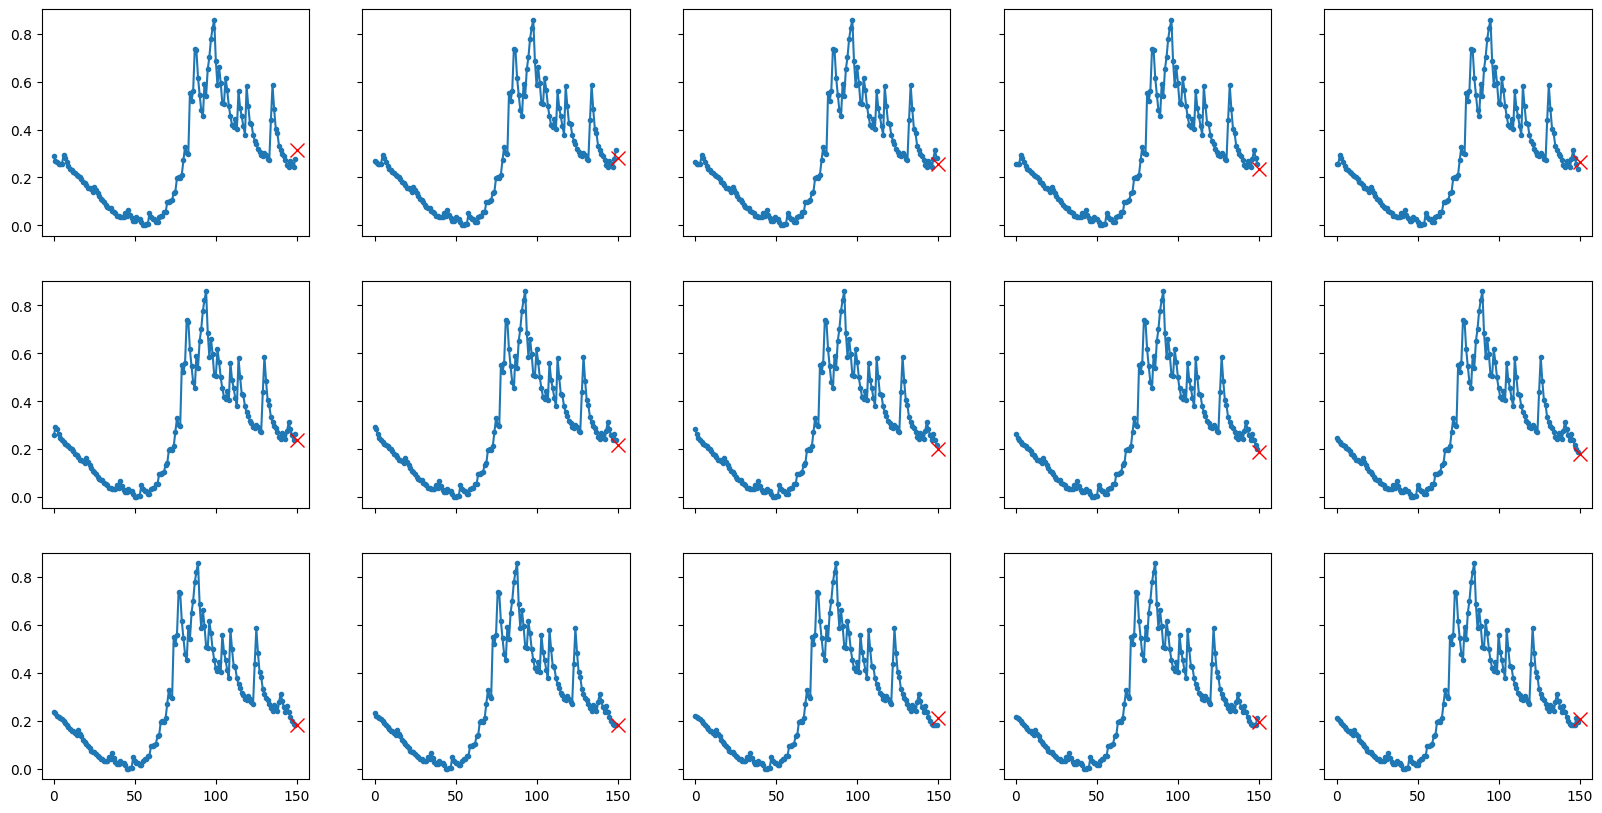

In [ ]:
x_train.shape, np.expand_dims(np.expand_dims(y_train, axis=1),axis=1).shape
plot_series(x_train, np.expand_dims(np.expand_dims(y_train, axis=1),axis=1))

In [ ]:
x_train.shape, y_train.shape

((270, 1, 150), (270,))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Carga los datos del archivo CSV
df = pd.read_csv(r"cpu-train-a.csv")

# Selecciona la columna que deseas graficar
data = df['cpu']

predicted_data = 0.8

# Grafica los datos utilizando un gráfico de línea
plt.plot(data, label='Real data')
plt.plot(len(data), predicted_data, "bx", markersize=10, label='Predicted data', color='red')


# Agrega títulos y etiquetas de eje al gráfico
plt.title('CPU train data')
plt.xlabel('tiempo')
plt.ylabel('cpu')

# Muestra el gráfico en pantalla
plt.show()

### ***-----------------***

# ***Hyperparameters tunning***

### ***Preparing training dataset***

In [ ]:

# Parameters:
window_size = 150


scaler, x_train, y_train, x_test, y_test = get_data(window_size)

y_train = y_train[:,0,0]
y_test = y_test[:,0,0]

print(x_train.shape)

print(y_train.shape)

(270, 1, 150)
(270,)


<ipython-input-3-f8d36b73ece5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df_test.iloc[0:i])
<ipython-input-3-f8d36b73ece5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df_test.iloc[0:i])
<ipython-input-3-f8d36b73ece5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df_test.iloc[0:i])
<ipython-input-3-f8d36b73ece5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df_test.iloc[0:i])
<ipython-input-3-f8d36b73ece5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(df_test.i

### ***Defining Architecture model function with randomly initialized hyperparameters***

In [ ]:
#NOTE: Add default optimizer, otherwise throws error 'optimizer not legal parameter'
def define_model(LR=0.01, dropout_rate = 0.2, B1 = 0.05, B2= 0.8999, window_size = 150, units=32):
    model = Sequential()
    # # Make tensors because of custom loss function
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(1, window_size), return_sequences=True))
    model.add(PermaDropout(dropout_rate))
    model.add(LSTM(units, activation='relu', return_sequences=False))
    model.add(Dense(1))
    opt = keras.optimizers.Adam(learning_rate=LR, beta_1=B1, beta_2=B2)
    model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

    return model

### ***Possible Hyperparameters values list for tunning***

In [ ]:
LR = [0.01, 0.001, 0.0001]
dropout_rate = [0.2, 0.3]

B1 = [0.05, 0.10, 0.15]
B2 = [0.2, 0.4, 0.9]

units = [32, 64]
batch_size = [150, 200, 250]
epochs = [300, 400, 500]

param_grid = dict(LR=LR,dropout_rate=dropout_rate,
                  B1=B1,B2=B2,
                  units=units, batch_size=batch_size,
                  epochs=epochs)

In [ ]:
print(param_grid)

{'LR': [0.01, 0.001, 0.0001], 'dropout_rate': [0.2, 0.3], 'B1': [0.05, 0.1, 0.15], 'B2': [0.2, 0.4, 0.9], 'units': [32, 64], 'batch_size': [150, 200, 250], 'epochs': [300, 400, 500]}


### ***Method 1***
### ***Randomized Search Optimization***

In [ ]:
############################################################
# Random Search CV
from sklearn.model_selection import RandomizedSearchCV

# implement the Scikit-Learn classifier interface
# requires model defined as a function, which we already have
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=define_model,
                        verbose=1)



<ipython-input-28-905dc571a5b0>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=define_model,


In [ ]:
#n_jobs=16 uses 16 CPUs. Try not to do -1 on your system as it may hang!!!
# -1 refers to using all available CPUs
#Cross validation, cv=3

Random_Search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=5, n_jobs=-1, verbose=5)

Random_Search_result = Random_Search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Epoch 1/300
2/2 [==============================] - 3s 17ms/step - loss: 4845.9888 - accuracy: 0.0074
Epoch 2/300
2/2 [==============================] - 0s 17ms/step - loss: 4842.7671 - accuracy: 0.0074
Epoch 3/300
2/2 [==============================] - 0s 14ms/step - loss: 4837.2378 - accuracy: 0.0074
Epoch 4/300
2/2 [==============================] - 0s 14ms/step - loss: 4827.8374 - accuracy: 0.0074
Epoch 5/300
2/2 [==============================] - 0s 13ms/step - loss: 4811.9263 - accuracy: 0.0074
Epoch 6/300
2/2 [==============================] - 0s 14ms/step - loss: 4786.8398 - accuracy: 0.0111
Epoch 7/300
2/2 [==============================] - 0s 14ms/step - loss: 4748.1733 - accuracy: 0.0037
Epoch 8/300
2/2 [==============================] - 0s 14ms/step - loss: 4682.4502 - accuracy: 0.0037
Epoch 9/300
2/2 [==============================] - 0s 14ms/step - loss: 4571.2827 - accuracy: 0.0037
Epoch 10/300
2/2 [=============

### ***Tunned Hyperparameters***

In [ ]:
# summarize results
print("Best Hyperparameters: %f using Random Search optimization Method %s" % (Random_Search_result.best_score_, Random_Search_result.best_params_))
print("\n")
means = Random_Search_result.cv_results_['mean_test_score']
stds = Random_Search_result.cv_results_['std_test_score']
params = Random_Search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

Best Hyperparameters: 0.003704 using Random Search optimization Method {'units': 32, 'epochs': 300, 'dropout_rate': 0.2, 'batch_size': 200, 'LR': 0.001, 'B2': 0.9, 'B1': 0.05}


Mean = 0.003704 (std=0.007407) with: {'units': 32, 'epochs': 300, 'dropout_rate': 0.2, 'batch_size': 200, 'LR': 0.001, 'B2': 0.9, 'B1': 0.05}
Mean = 0.003704 (std=0.007407) with: {'units': 64, 'epochs': 500, 'dropout_rate': 0.2, 'batch_size': 150, 'LR': 0.001, 'B2': 0.2, 'B1': 0.15}
Mean = 0.003704 (std=0.007407) with: {'units': 64, 'epochs': 300, 'dropout_rate': 0.2, 'batch_size': 200, 'LR': 0.0001, 'B2': 0.9, 'B1': 0.05}
Mean = 0.003704 (std=0.007407) with: {'units': 32, 'epochs': 400, 'dropout_rate': 0.2, 'batch_size': 250, 'LR': 0.01, 'B2': 0.9, 'B1': 0.05}
Mean = 0.003704 (std=0.007407) with: {'units': 64, 'epochs': 400, 'dropout_rate': 0.2, 'batch_size': 250, 'LR': 0.0001, 'B2': 0.9, 'B1': 0.15}


In [ ]:
print(Random_Search_result.score(x_test,y_test))

### ***Method 2***
### ***Grid Search Optimization***

In [ ]:
############################################################
# Random Search CV
from sklearn.model_selection import GridSearchCV

# implement the Scikit-Learn classifier interface
# requires model defined as a function, which we already have
from keras.wrappers.scikit_learn import KerasClassifier


model = KerasClassifier(build_fn=define_model,
                        verbose=1)


In [ ]:
#n_jobs=16 uses 16 CPUs. Try not to do -1 on your system as it may hang!!!
# -1 refers to using all available CPUs
#Cross validation, cv=3
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

NameError: ignored